In [1]:
import pandas as pd
data = pd.read_csv("2023-06-13-survey.csv") 
data

,Timestamp,Operating System,CPU Cycle Rate (in GHz),CPU Number of Cores (int),RAM (in GB),Hard Drive Size (in GB),GPU (short description as a string),GPU CUDA Number of Cores (int)
0,6/13/2023 13:21:08,Windows,3.0,8,16,935,NVIDIA GeForce RTX 2060 with Max-Q Design,5888
1,6/13/2023 13:23:33,I use Mac and Linux,2133.0,2,8,250,Intel Iris Plus Graphics,1
2,6/13/2023 13:24:29,MacOS,3.2,8,8,256,M1,8
3,6/13/2023 13:25:04,MacOS,3.6,12,32,1000,M2 Max,38
4,6/13/2023 13:25:31,Windows,2.3,8,16,500,NVIDIA GeForce RTX 3050 Ti Laptop GPU,2560
...,...,...,...,...,...,...,...,...
57,6/13/2023 13:45:40,Windows,2.5,2,8,237,Intel(R) HD Graphics 620,0
58,6/13/2023 13:45:42,MacOS,2.3,2,8,256,M2 integrates an Apple designed ten-core (eigh...,0
59,6/13/2023 13:47:42,MacOS,2.3,2,8,500,Integrated Graphics,0
60,6/13/2023 13:49:17,Windows,1.8,5,8,224,Zero point two out of three point nine,5


/Users/rosee.m./opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='CPU Cycle Rate (in GHz)'>

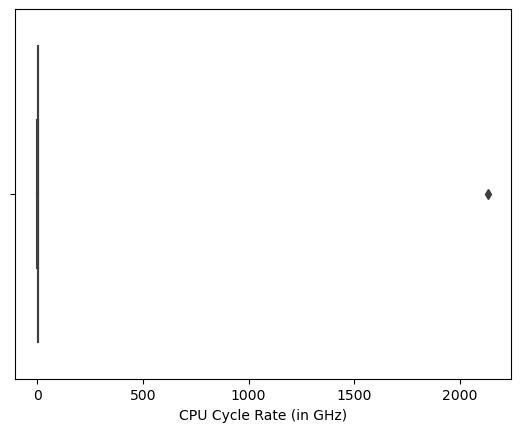

In [4]:
import seaborn as sns
sns.boxplot(data['CPU Cycle Rate (in GHz)'])

In [35]:
import numpy as np
Q1 = np.percentile(data['CPU Cycle Rate (in GHz)'], 25)
Q3 = np.percentile(data['CPU Cycle Rate (in GHz)'], 75)
IQR = Q3 - Q1
upper = Q3 +1.5*IQR
upper_array=np.where(data['CPU Cycle Rate (in GHz)']>=upper)[0]
upper_array
print("Old Shape: ", data.shape)
data.drop(index=upper_array, inplace=True)
print("New Shape: ", data.shape)

Old Shape:  (62, 8)
New Shape:  (61, 8)


/Users/rosee.m./opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



2.4

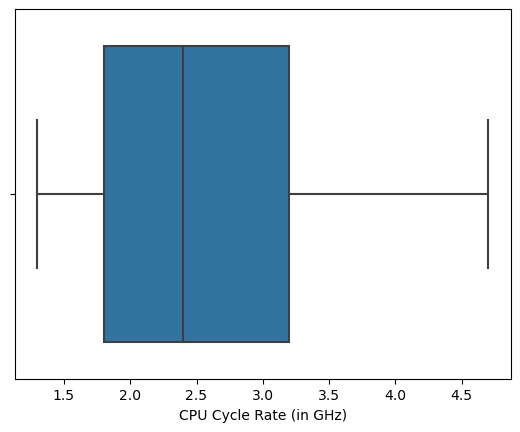

In [43]:
import seaborn as sns
sns.boxplot(data['CPU Cycle Rate (in GHz)'])
M = np.percentile(data['CPU Cycle Rate (in GHz)'], 50)
M

In [42]:
import plotly.express as px
fig = px.histogram(data, x="CPU Cycle Rate (in GHz)", title="Distribution of CPU Cycle Rate of MSDS Residential Class of 2024")
fig.update_layout(
    yaxis_title="Count")
fig.show()